## Student grades prediction Project

In [1]:
#Importing necessary libraries 
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
ds=pd.read_csv(r'D:\Files\Grades.csv')
ds

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


This data frame contains information related to **Grades of students**. It contains **571 rows and 43 columns** out of which 42 columns are inputs and 1 column is **target variable i.e. 'CGPA' column**.  
The data frame contains both numeric and catagorical data. Target variable has countinuous data thus it represents a **Regression Problem**.  
**The goal is to predict CGPA of a student based on different grades in four years.**  

In [3]:
ds.columns #Checking columns of data frame

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [4]:
#checking for whitespace characters 
col=ds.columns.tolist() #Storing columns name into list
space=''#Initilizing empty 'space' variable
validation=0#Initilizaing variable
for i in col:#Iterating through columns
    
    for a in range(1,11): #Iterating for 10 number of times i.e. it can detect upto 10 number of whitespaces per row
        space+=' ' #Incrementing one white space character per iteration
        
        if not ds.loc[ds[i]==space].empty:#Checking if any row contains white space characters
            validation+=1#increasing 1 in 'validation' variable
            print(f'There are white space characters present in {i} Column with length of  {len(space)}  white space characters')#Printing if a column contains white space character along with number of  white space characters present in a single row(Note:It does not print total number of white space characters present in a column)
            
    space=''#Reseting 'space' variable
    
if validation==0:
    print('This data frame does not contains any whitespace characters.')

This data frame does not contains any whitespace characters.


In [5]:
ds.dtypes#Checking dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

There are two types of data present in this data frame which are object and float64. Majority of the data have object data type.

In [6]:
ds.isnull().sum() #Checking null values

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

All of the columns have null values except for the CGPA,Seat No.,PH-121,HS-101 and CS-105 columns.

In [7]:
n_columns=ds.isnull().sum()[ds.isnull().sum() > 0].index.tolist()#Storing columns name which have null values
n_columns

['CY-105',
 'HS-105/12',
 'MT-111',
 'CS-106',
 'EL-102',
 'EE-119',
 'ME-107',
 'CS-107',
 'HS-205/20',
 'MT-222',
 'EE-222',
 'MT-224',
 'CS-210',
 'CS-211',
 'CS-203',
 'CS-214',
 'EE-217',
 'CS-212',
 'CS-215',
 'MT-331',
 'EF-303',
 'HS-304',
 'CS-301',
 'CS-302',
 'TC-383',
 'MT-442',
 'EL-332',
 'CS-318',
 'CS-306',
 'CS-312',
 'CS-317',
 'CS-403',
 'CS-421',
 'CS-406',
 'CS-414',
 'CS-419',
 'CS-423',
 'CS-412']

In [8]:
for i in n_columns:#Itertaing 'n_columns' variable
    mode=ds[i].mode()[0]#storing mode value in 'mode' variable
    ds[i].fillna(mode,inplace=True)#replacing all nan values present in a column with mode  
    print(f'Using mode value as {mode} of {i} column.')#printing

Using mode value as A of CY-105 column.
Using mode value as A of HS-105/12 column.
Using mode value as A- of MT-111 column.
Using mode value as A- of CS-106 column.
Using mode value as A- of EL-102 column.
Using mode value as A- of EE-119 column.
Using mode value as A- of ME-107 column.
Using mode value as A of CS-107 column.
Using mode value as A- of HS-205/20 column.
Using mode value as A- of MT-222 column.
Using mode value as A of EE-222 column.
Using mode value as A- of MT-224 column.
Using mode value as A- of CS-210 column.
Using mode value as A- of CS-211 column.
Using mode value as A- of CS-203 column.
Using mode value as C of CS-214 column.
Using mode value as A- of EE-217 column.
Using mode value as A- of CS-212 column.
Using mode value as A- of CS-215 column.
Using mode value as A of MT-331 column.
Using mode value as B of EF-303 column.
Using mode value as A- of HS-304 column.
Using mode value as A- of CS-301 column.
Using mode value as A- of CS-302 column.
Using mode value 

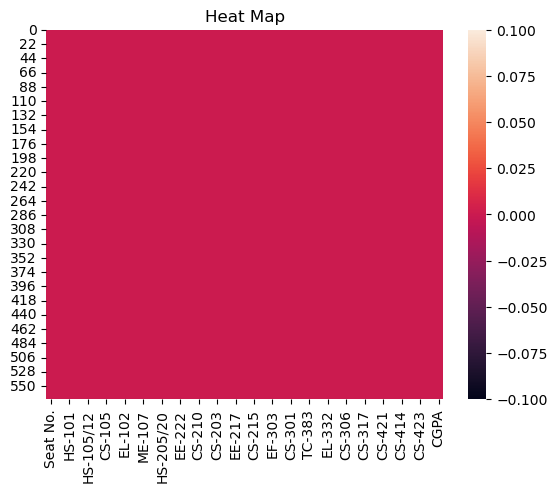

In [9]:
sb.heatmap(ds.isnull())#Visualizing null values via Heatmap
plt.title('Heat Map')
plt.show()

All the null values have been handled.

In [10]:
#creating function to check for duplicates vales in dataframe

def dup(x):#takes one argument i.e variable which stores variable
    a=x.duplicated().sum()#storing sum of duplicate values in 'a' variable.
    if a==0:#first condition
        print('This data frame does not contains duplicate values.')#printing
    elif a==1:#second condition
        print('There is only 1 duplicate value present in the data frame.')#printing
    else:
        print(f'Total duplicates values present in DataFrame are {x.duplicated().sum()}.')#printing
    
dup(ds)

This data frame does not contains duplicate values.


In [11]:
ds.info()#Checking more information related to data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     571 non-null    object 
 4   HS-105/12  571 non-null    object 
 5   MT-111     571 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     571 non-null    object 
 8   EL-102     571 non-null    object 
 9   EE-119     571 non-null    object 
 10  ME-107     571 non-null    object 
 11  CS-107     571 non-null    object 
 12  HS-205/20  571 non-null    object 
 13  MT-222     571 non-null    object 
 14  EE-222     571 non-null    object 
 15  MT-224     571 non-null    object 
 16  CS-210     571 non-null    object 
 17  CS-211     571 non-null    object 
 18  CS-203     571 non-null    object 
 19  CS-214     571 non-null    object 
 20  EE-217    

This shows information related to the columns and about their Non-null count and Dtype. It also shows the memory usage , which is 191.9+ KB in this case.

In [12]:
for i in col:#Iterating col variable
    print('\n',i,':-\nUnique values:',ds[i].unique(),'\nNumber of unique values:',ds[i].nunique(),'\n\n',ds[i].value_counts().to_frame('Value Counts'))#Printing


 Seat No. :-
Unique values: ['CS-97001' 'CS-97002' 'CS-97003' 'CS-97004' 'CS-97005' 'CS-97006'
 'CS-97007' 'CS-97008' 'CS-97009' 'CS-97010' 'CS-97011' 'CS-97012'
 'CS-97013' 'CS-97014' 'CS-97015' 'CS-97016' 'CS-97017' 'CS-97018'
 'CS-97019' 'CS-97020' 'CS-97021' 'CS-97022' 'CS-97023' 'CS-97024'
 'CS-97025' 'CS-97026' 'CS-97027' 'CS-97028' 'CS-97029' 'CS-97030'
 'CS-97031' 'CS-97032' 'CS-97033' 'CS-97034' 'CS-97035' 'CS-97036'
 'CS-97037' 'CS-97038' 'CS-97039' 'CS-97040' 'CS-97041' 'CS-97042'
 'CS-97043' 'CS-97044' 'CS-97045' 'CS-97046' 'CS-97047' 'CS-97048'
 'CS-97049' 'CS-97050' 'CS-97051' 'CS-97052' 'CS-97053' 'CS-97054'
 'CS-97055' 'CS-97056' 'CS-97057' 'CS-97058' 'CS-97059' 'CS-97060'
 'CS-97061' 'CS-97062' 'CS-97063' 'CS-97064' 'CS-97065' 'CS-97066'
 'CS-97067' 'CS-97068' 'CS-97069' 'CS-97070' 'CS-97071' 'CS-97072'
 'CS-97073' 'CS-97074' 'CS-97075' 'CS-97076' 'CS-97077' 'CS-97078'
 'CS-97079' 'CS-97080' 'CS-97081' 'CS-97082' 'CS-97083' 'CS-97084'
 'CS-97085' 'CS-97086' 'CS-97087'

This gives a breif information about unique values, count of unique values and value counts of each column present in the dataset.  
All unqiue values are present in Seat No. feature and as it contains object type data, we can drop it.  
Most of values present in target variable are unique.

In [13]:
ds.drop('Seat No.',axis=1,inplace=True)
ds

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


Now data frame contains **42 columns** out of which 41 columns are feature and remaing column is target variable.

In [14]:
ds.describe()#Using describe function

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


This gives the statistical information of the numerical columns i.e target variable in this case. From the above description we can observe the following:   
1)There are no missing values.    
2)Mean is less than 50% in target variable which means that the data might be skewed to the left in this column.  

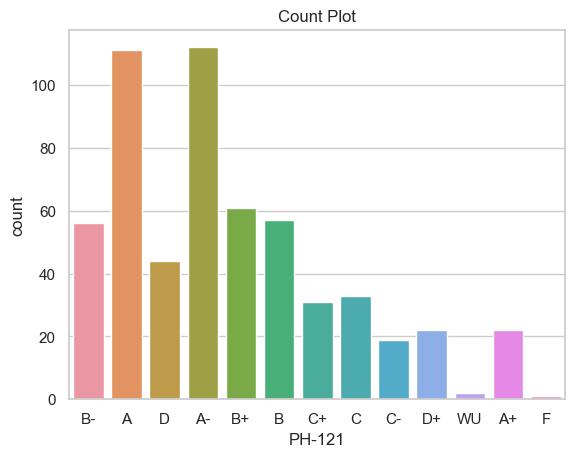

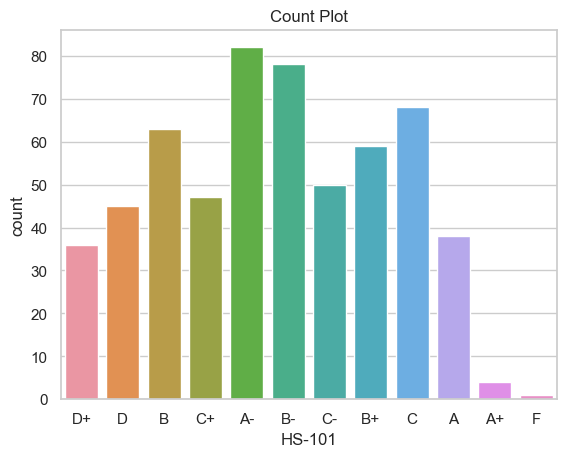

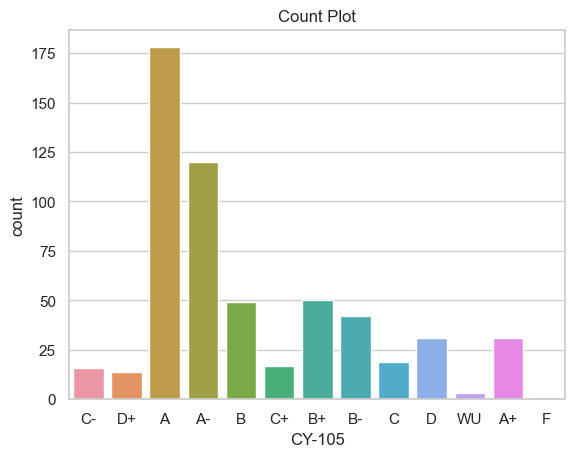

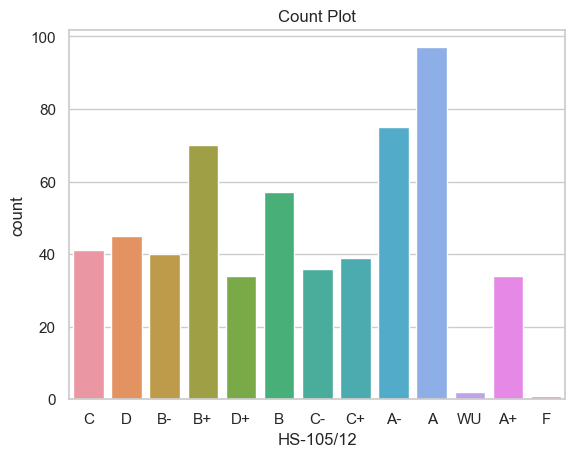

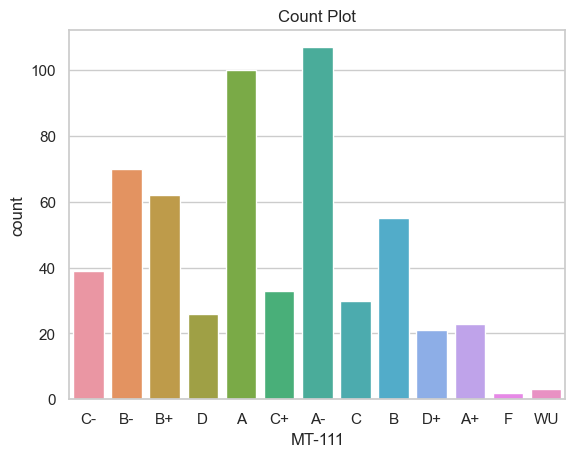

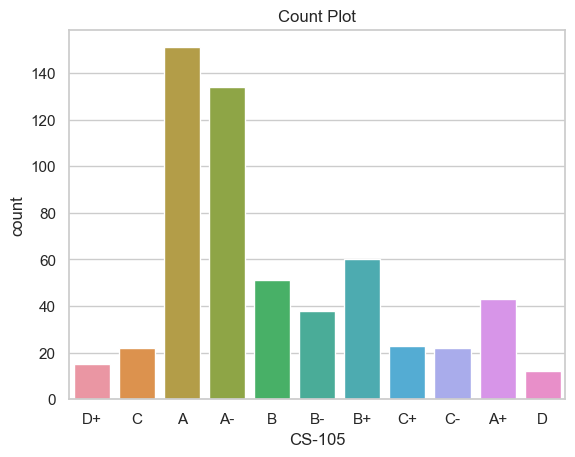

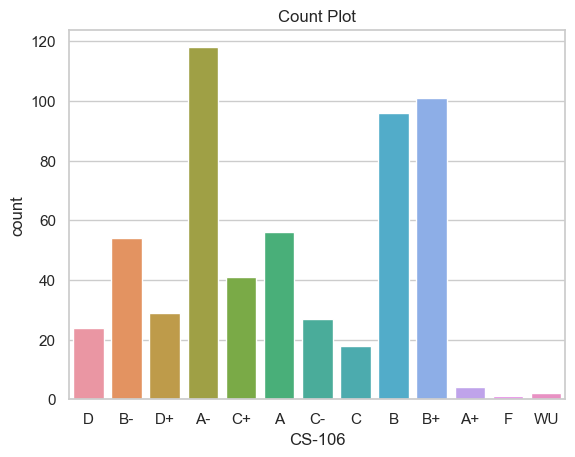

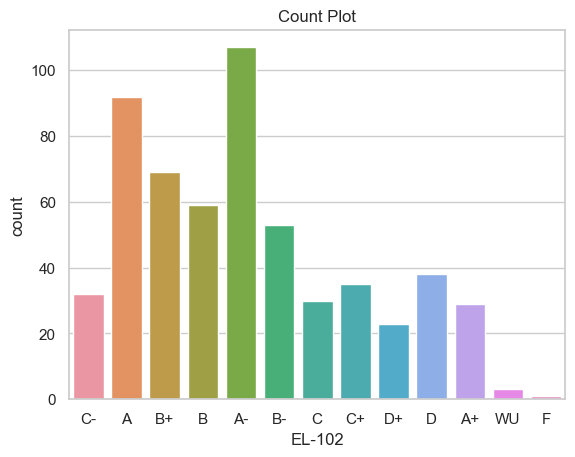

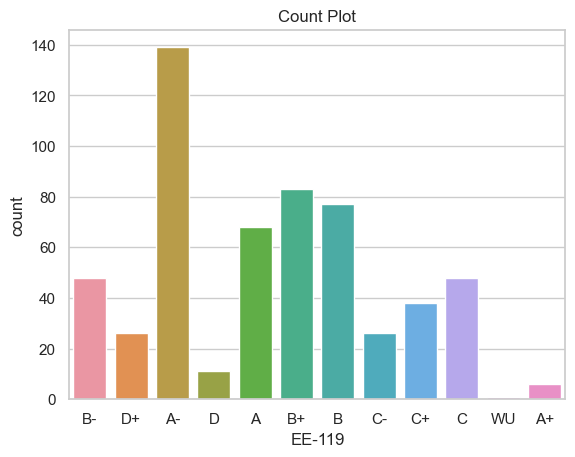

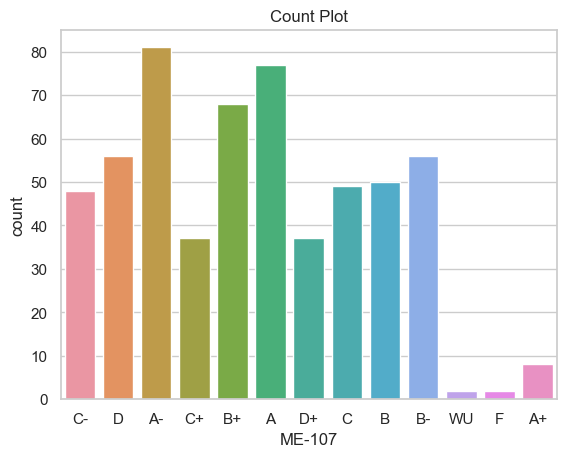

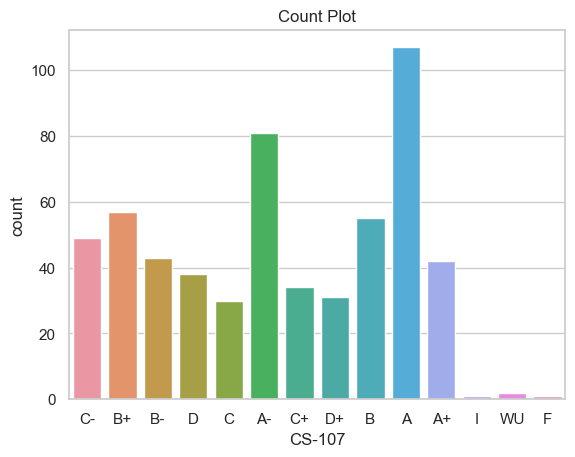

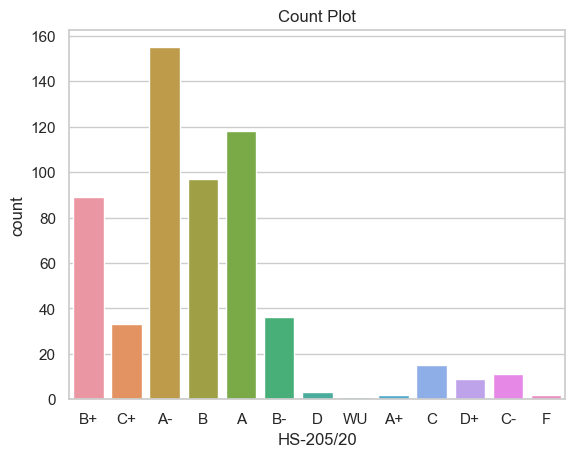

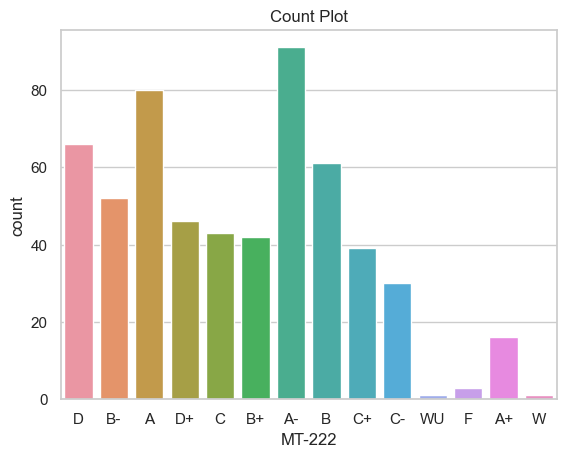

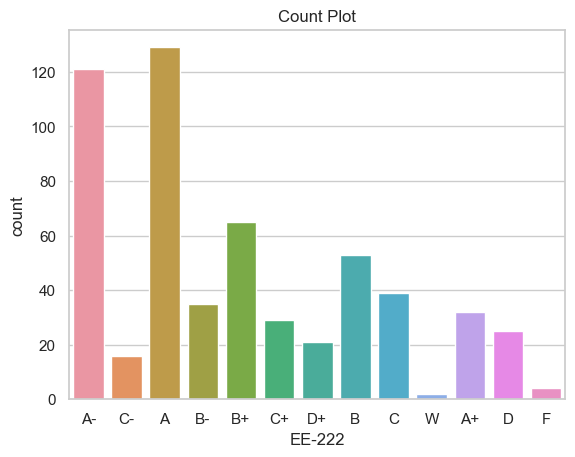

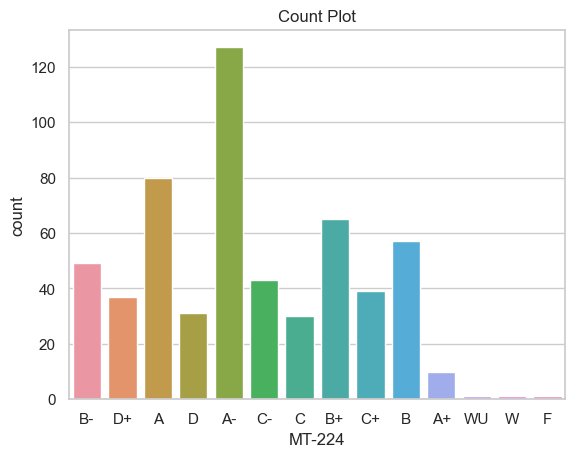

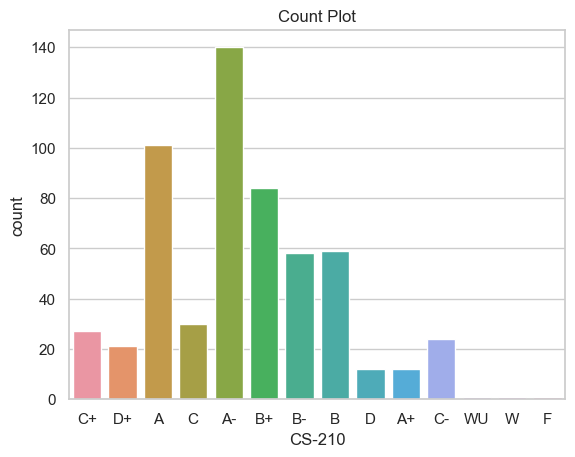

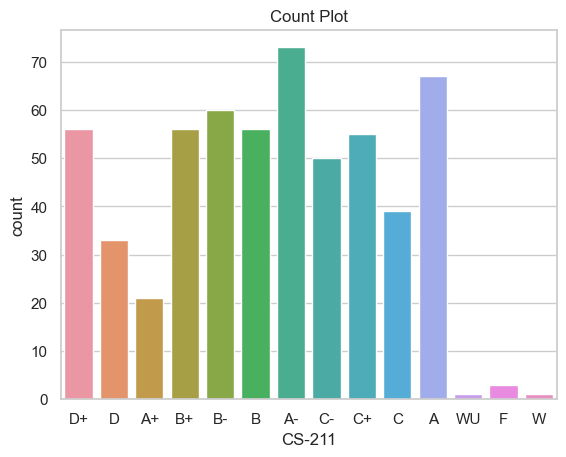

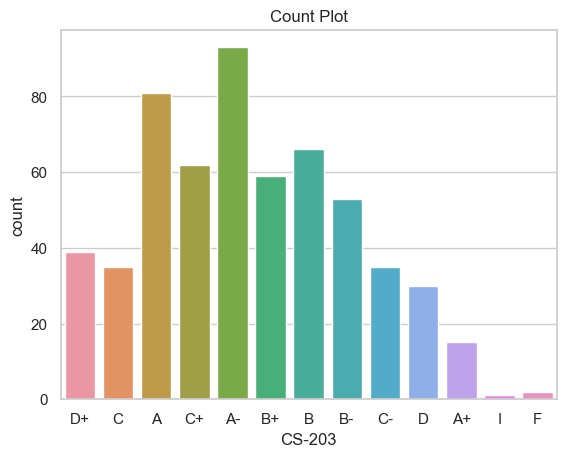

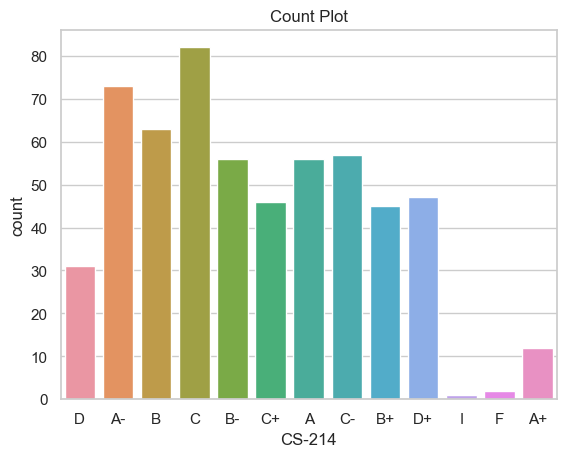

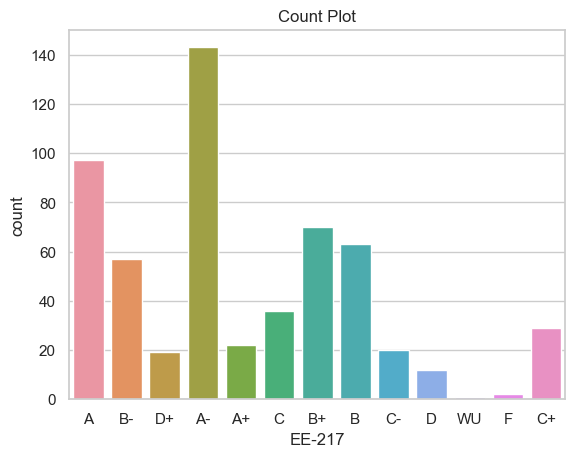

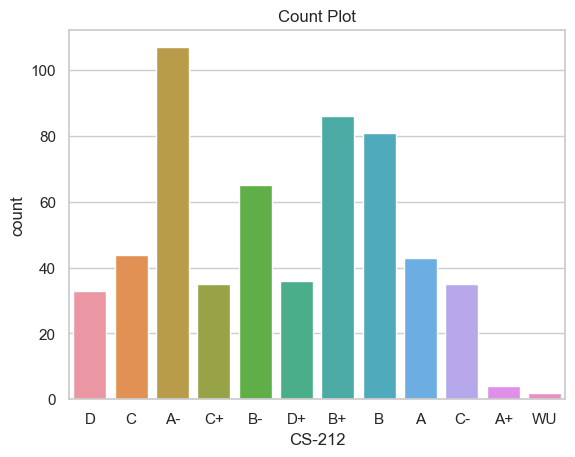

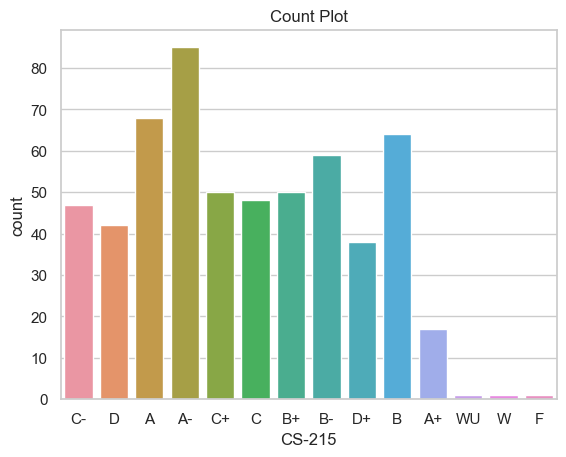

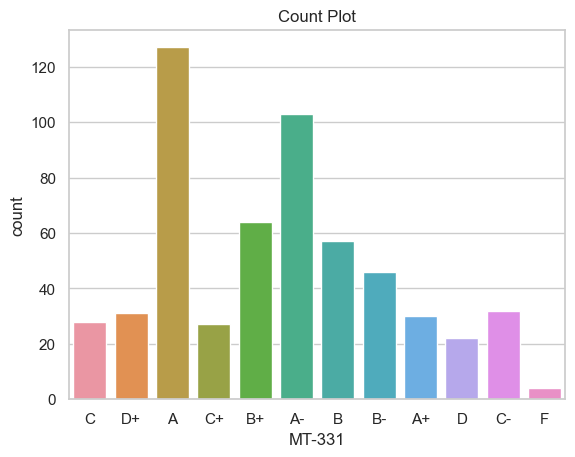

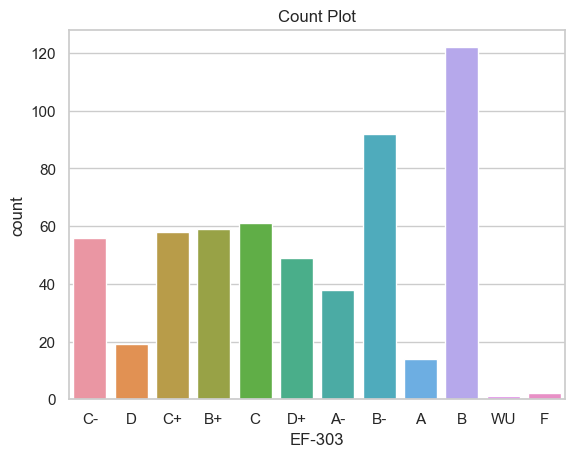

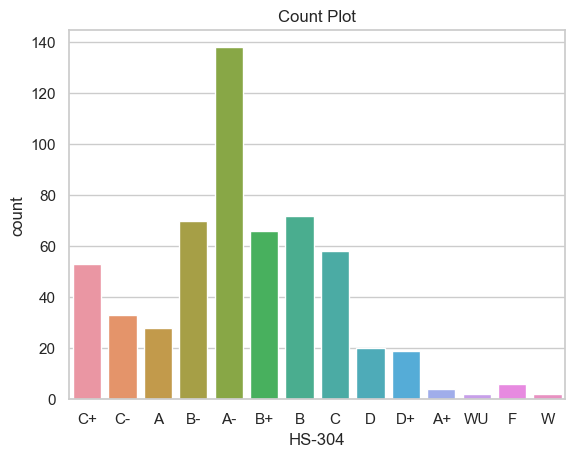

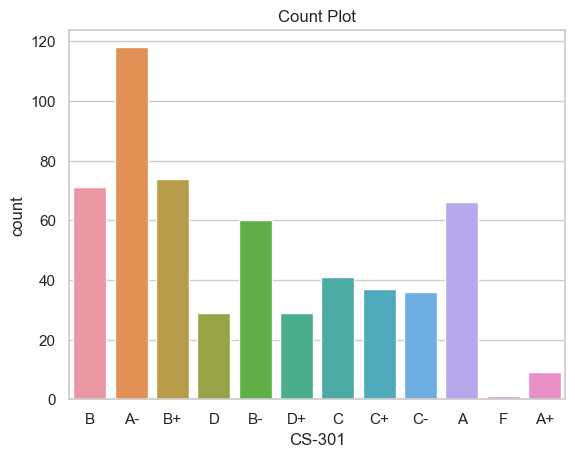

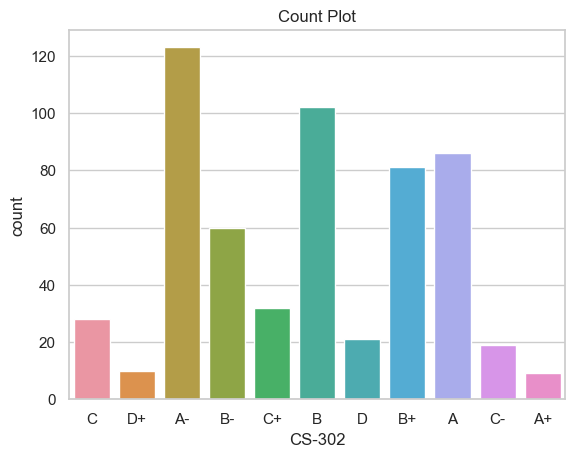

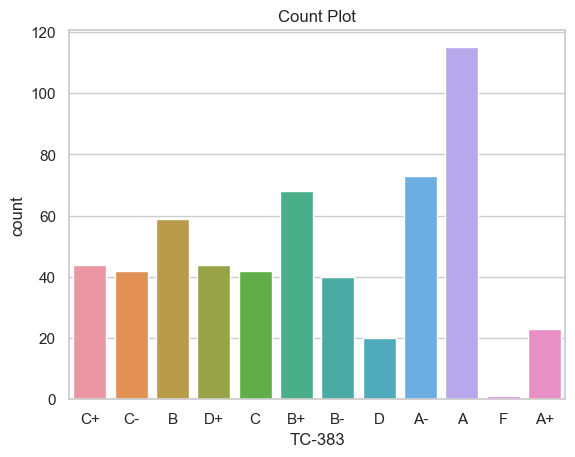

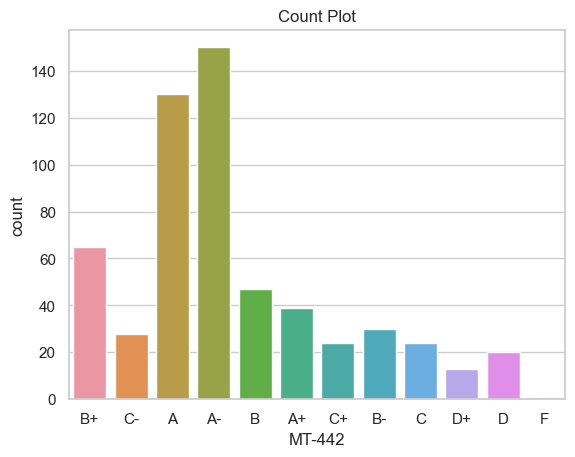

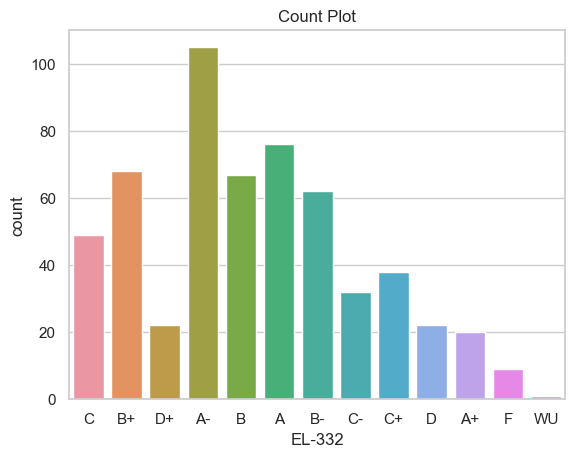

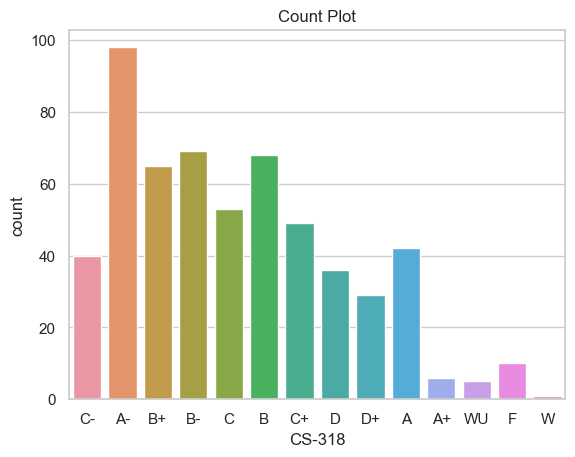

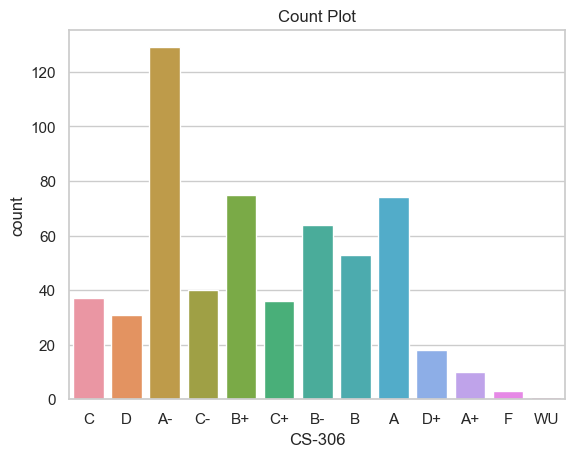

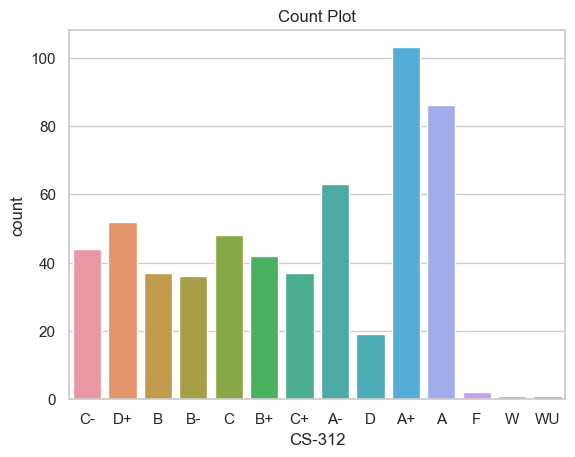

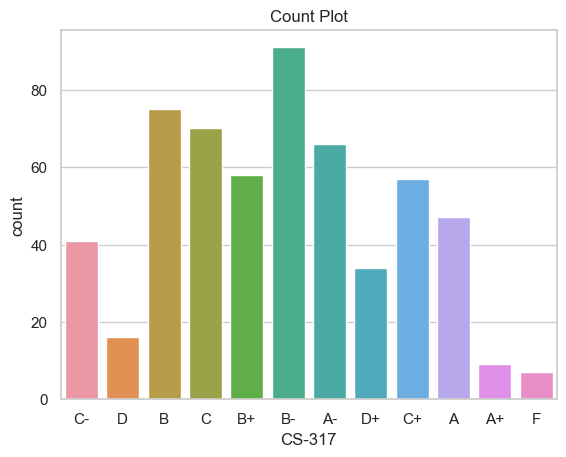

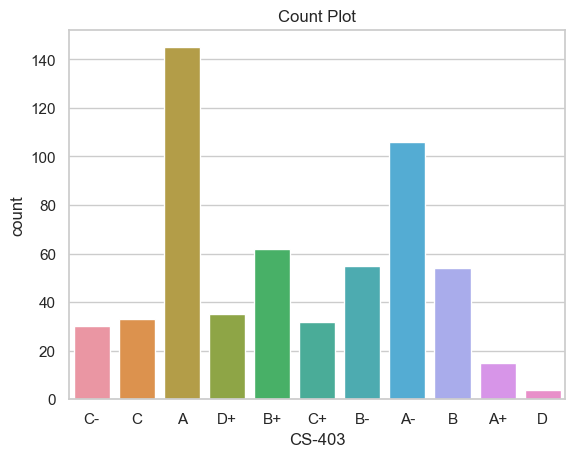

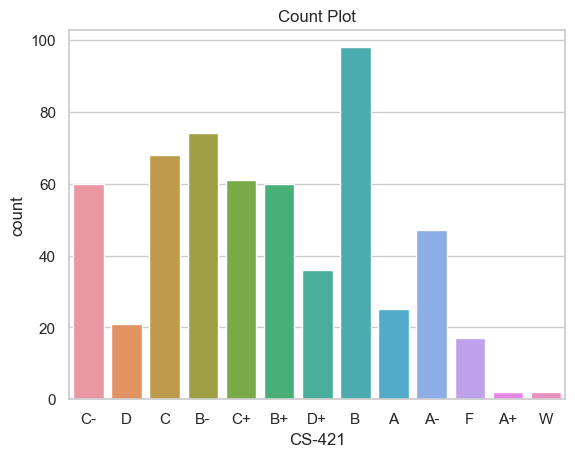

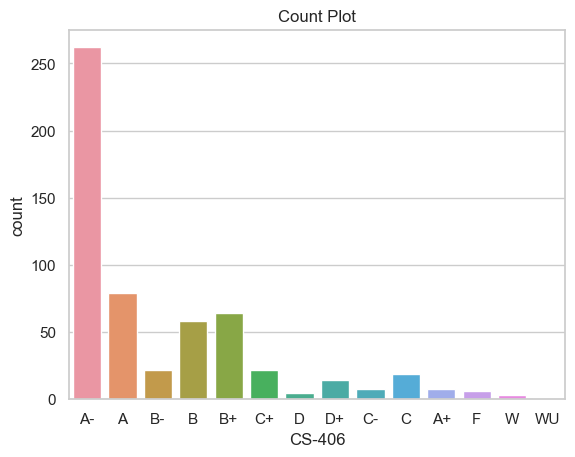

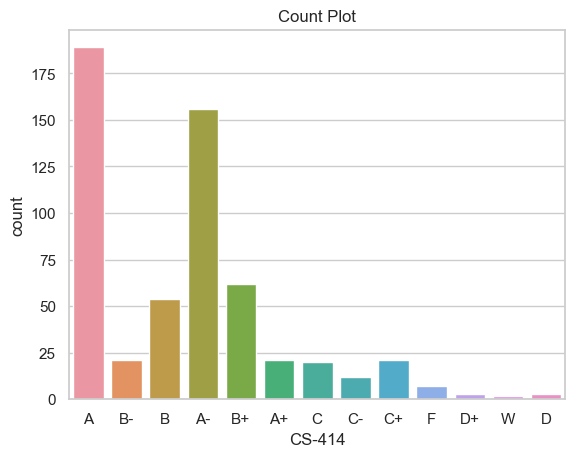

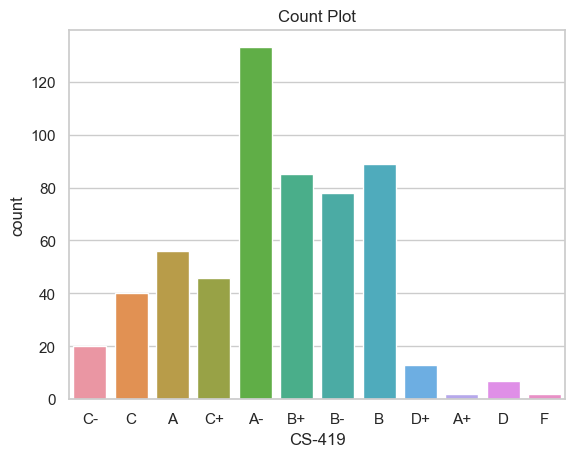

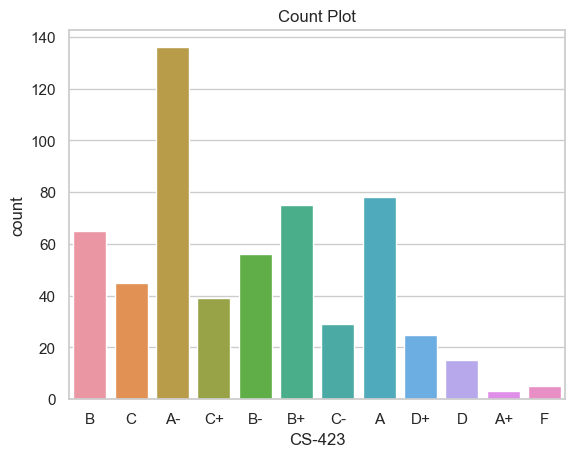

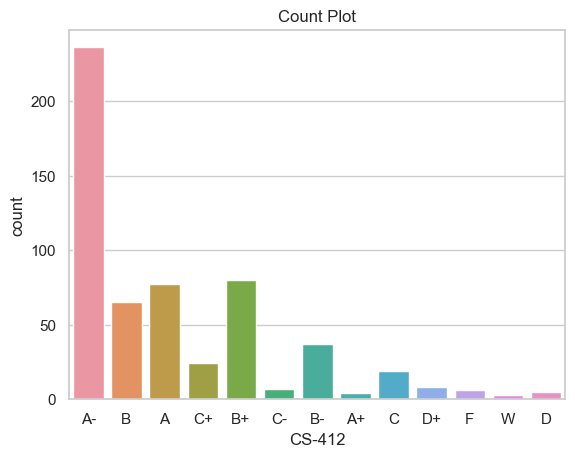

In [15]:
#Visualizing all features via Count Plot
sb.set_theme(style="whitegrid")
col=ds.columns.tolist()
for i in col[:-1]:
    sb.countplot(data=ds,x=i)
    plt.title("Count Plot")
    plt.show()

In PH-121 feature, A and A- are high than the rest of the data. A and A- are almost same.  
In HS-101 feature, A- and B- are high than the rest of the data. A- is little bit high than B-.  
In CY-105 feature, A and A- are high than the rest of the data. A is fairly high than A-.  
In HS-105/12 feature,A and A- are high than the rest of the data. A is bit high than A-.  
In MT-111 feature, A- and A are high than the rest of the data. A- is little bit high than A.  
In CS-105 feature, A and A- are high then the rest of the data. A is little bit high than A-.   
In CS-106 feature,  A- is high then the rest of the data.  
In EL-102 feature,  A- is high then the rest of the data.  
In EE-119 feature,  A- is high then the rest of the data.  
In ME-107 feature,  A- and A is bit high then the rest of the data. A- is little bit high than A.    
In CS-107 feature,  A- is high then the rest of the data. A is bit high than A-.  
In HS-205/20 feature,  A- and A are high then the rest of the data. A- is little bit high than A.  
In MT-222 feature,  A- and A are high then the rest of the data. A- is little bit high than A.  
In EE-222 feature,  A- and A are high then the rest of the data. A is little bit high than A-.  
In MT-224 feature,  A- is high then the rest of the data.  
In CS-210 feature,  A- and A are high then the rest of the data. A- is little bit high than A.  
In CS-211 feature,  A- and A are high then the rest of the data. A- is little bit high than A.  
In CS-203 feature,  A- and A are high then the rest of the data. A- is little bit high than A.  
In CS-214 feature,  A- and C are high then the rest of the data. C is little bit high than A-.  
In EE-217 feature,  A- is high then the rest of the data.  
In CS-212 feature,  A- and B+ are high then the rest of the data. A- is little bit high than B+.  
In CS-215 feature,  A- and A are high then the rest of the data. A- is little bit high than A.  
In MT-331 feature,  A- and A are high then the rest of the data. A is little bit high than A-.  
In EF-303 feature,  B- and B are high then the rest of the data. B is little bit high than B-.  
In HS-304 feature,  A- is high then the rest of the data.  
In CS-301 feature,  A- is high then the rest of the data.  
In CS-302 feature,  A- and B are high then the rest of the data. A- is little bit high than B.  
In TC-383 feature,  A is high then the rest of the data.  
In MT-442 feature,  A- and A are high then the rest of the data. A- is little bit high than A.  
In EL-332 feature,  A- is high then the rest of the data.  
In CS-318 feature,  A- is high then the rest of the data.  
In CS-306 feature,  A- is high then the rest of the data.  
In CS-312 feature,  A+ and A are high then the rest of the data. A+ is little bit high than A.  
In CS-317 feature,  B- and B are high then the rest of the data. B- is little bit high than B.  
In CS-403 feature,  A- and A are high then the rest of the data. A is fairly high than A-.  
In CS-421 feature,  B and B- are high then the rest of the data. B is little bit high than B-.  
In CS-406 feature,  A- is high then the rest of the data.  
In CS-414 feature,  A- and A are high then the rest of the data. A is little bit high than A-.  
In CS-419 feature,  A- and B are high then the rest of the data. A- is little bit high than B.  
In CS-423 feature,  A- and A are high then the rest of the data. A- is fairly high than A.  
In CS-412 feature,  A- is high then the rest of the data. 

***We are not going to check outliers because all features are catagorical data and we do not detect outliers from target variable.***

Text(0.5, 1.0, 'Distribution Plot')

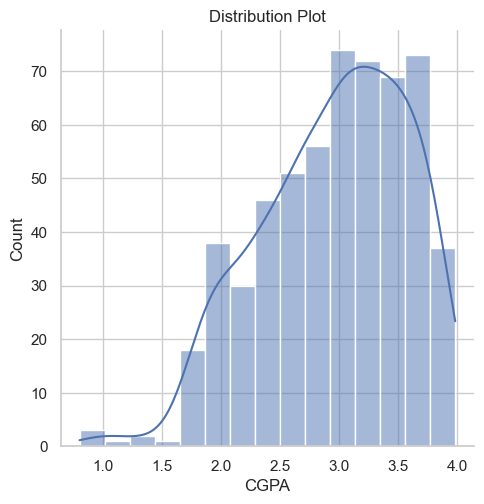

In [16]:
#checking distribution of target variable
sb.displot(ds['CGPA'],kde=True)
plt.title('Distribution Plot')

This data is almost normal.

In [17]:
ds.skew() #Checking skewness 

CGPA   -0.497203
dtype: float64

CGPA skewness value is in acceptable range.

In [18]:
#Encoding categorical columns using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ds

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [19]:
for i in col[:-1]:#Iterating 'col' variable
    ds[i]=le.fit_transform(ds[i])#Transforming features
ds    

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5,10,8,6,8,10,9,8,5,8,...,8,8,8,8,2,0,8,3,2,2.205
1,0,9,10,9,5,6,9,0,10,9,...,10,9,6,9,2,5,6,6,3,2.008
2,0,3,0,5,4,0,5,4,2,2,...,3,3,0,6,0,0,0,2,0,3.608
3,9,7,10,9,9,2,10,8,9,7,...,10,6,10,8,5,3,7,7,7,1.906
4,2,2,2,4,0,0,2,4,0,2,...,5,4,4,5,2,0,2,2,0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3,0,0,2,1,0,2,2,1,4,...,2,2,0,0,0,4,4,3,0,3.798
567,1,0,0,0,0,0,0,2,0,0,...,4,4,0,0,2,3,2,6,2,3.772
568,3,0,2,4,0,0,0,0,0,3,...,2,3,0,4,0,6,4,2,2,3.470
569,0,4,9,0,9,10,5,8,5,8,...,9,3,3,8,9,6,3,5,6,2.193


All the catagotical data have been encoded successfully.

In [20]:
#Checking correlation between independant and dependant varibales
cor=ds.corr()
cor

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
PH-121,1.000000,0.382436,0.557843,0.498561,0.468968,0.609990,0.293963,0.423942,0.579964,0.533558,...,0.038184,0.464022,0.321264,0.290351,0.280166,0.152437,0.462770,0.094921,0.293815,-0.663135
HS-101,0.382436,1.000000,0.335074,0.473132,0.432742,0.400713,0.312019,0.349412,0.309697,0.336545,...,0.213380,0.364250,0.229546,0.301934,0.265551,0.225977,0.284668,0.228103,0.226039,-0.537170
CY-105,0.557843,0.335074,1.000000,0.510123,0.538380,0.578573,0.378223,0.447539,0.467250,0.464418,...,0.261555,0.472137,0.464575,0.349827,0.129957,0.008774,0.430053,0.120885,0.064912,-0.658282
HS-105/12,0.498561,0.473132,0.510123,1.000000,0.494731,0.482406,0.499093,0.360304,0.400303,0.320137,...,0.263143,0.478816,0.451907,0.415946,0.168150,0.142806,0.465352,0.235029,0.153293,-0.613989
MT-111,0.468968,0.432742,0.538380,0.494731,1.000000,0.393684,0.500729,0.555895,0.409161,0.471685,...,0.467946,0.555098,0.410540,0.511463,0.300391,0.228637,0.502473,0.400679,0.269792,-0.730095
CS-105,0.609990,0.400713,0.578573,0.482406,0.393684,1.000000,0.286324,0.353949,0.507357,0.455470,...,0.059711,0.387639,0.279329,0.236345,0.237615,0.121965,0.306827,0.045134,0.179777,-0.613169
CS-106,0.293963,0.312019,0.378223,0.499093,0.500729,0.286324,1.000000,0.338645,0.269895,0.281233,...,0.450752,0.416562,0.426402,0.397195,0.129554,0.108916,0.421989,0.339963,0.185782,-0.534995
EL-102,0.423942,0.349412,0.447539,0.360304,0.555895,0.353949,0.338645,1.000000,0.448908,0.461690,...,0.301324,0.466556,0.304240,0.368959,0.253133,0.242234,0.379308,0.369173,0.265289,-0.642262
EE-119,0.579964,0.309697,0.467250,0.400303,0.409161,0.507357,0.269895,0.448908,1.000000,0.572964,...,0.156809,0.445496,0.341988,0.359230,0.297664,0.214165,0.465913,0.244615,0.320746,-0.646829
ME-107,0.533558,0.336545,0.464418,0.320137,0.471685,0.455470,0.281233,0.461690,0.572964,1.000000,...,0.199848,0.462568,0.336647,0.345832,0.300913,0.154184,0.440407,0.220977,0.293638,-0.663023


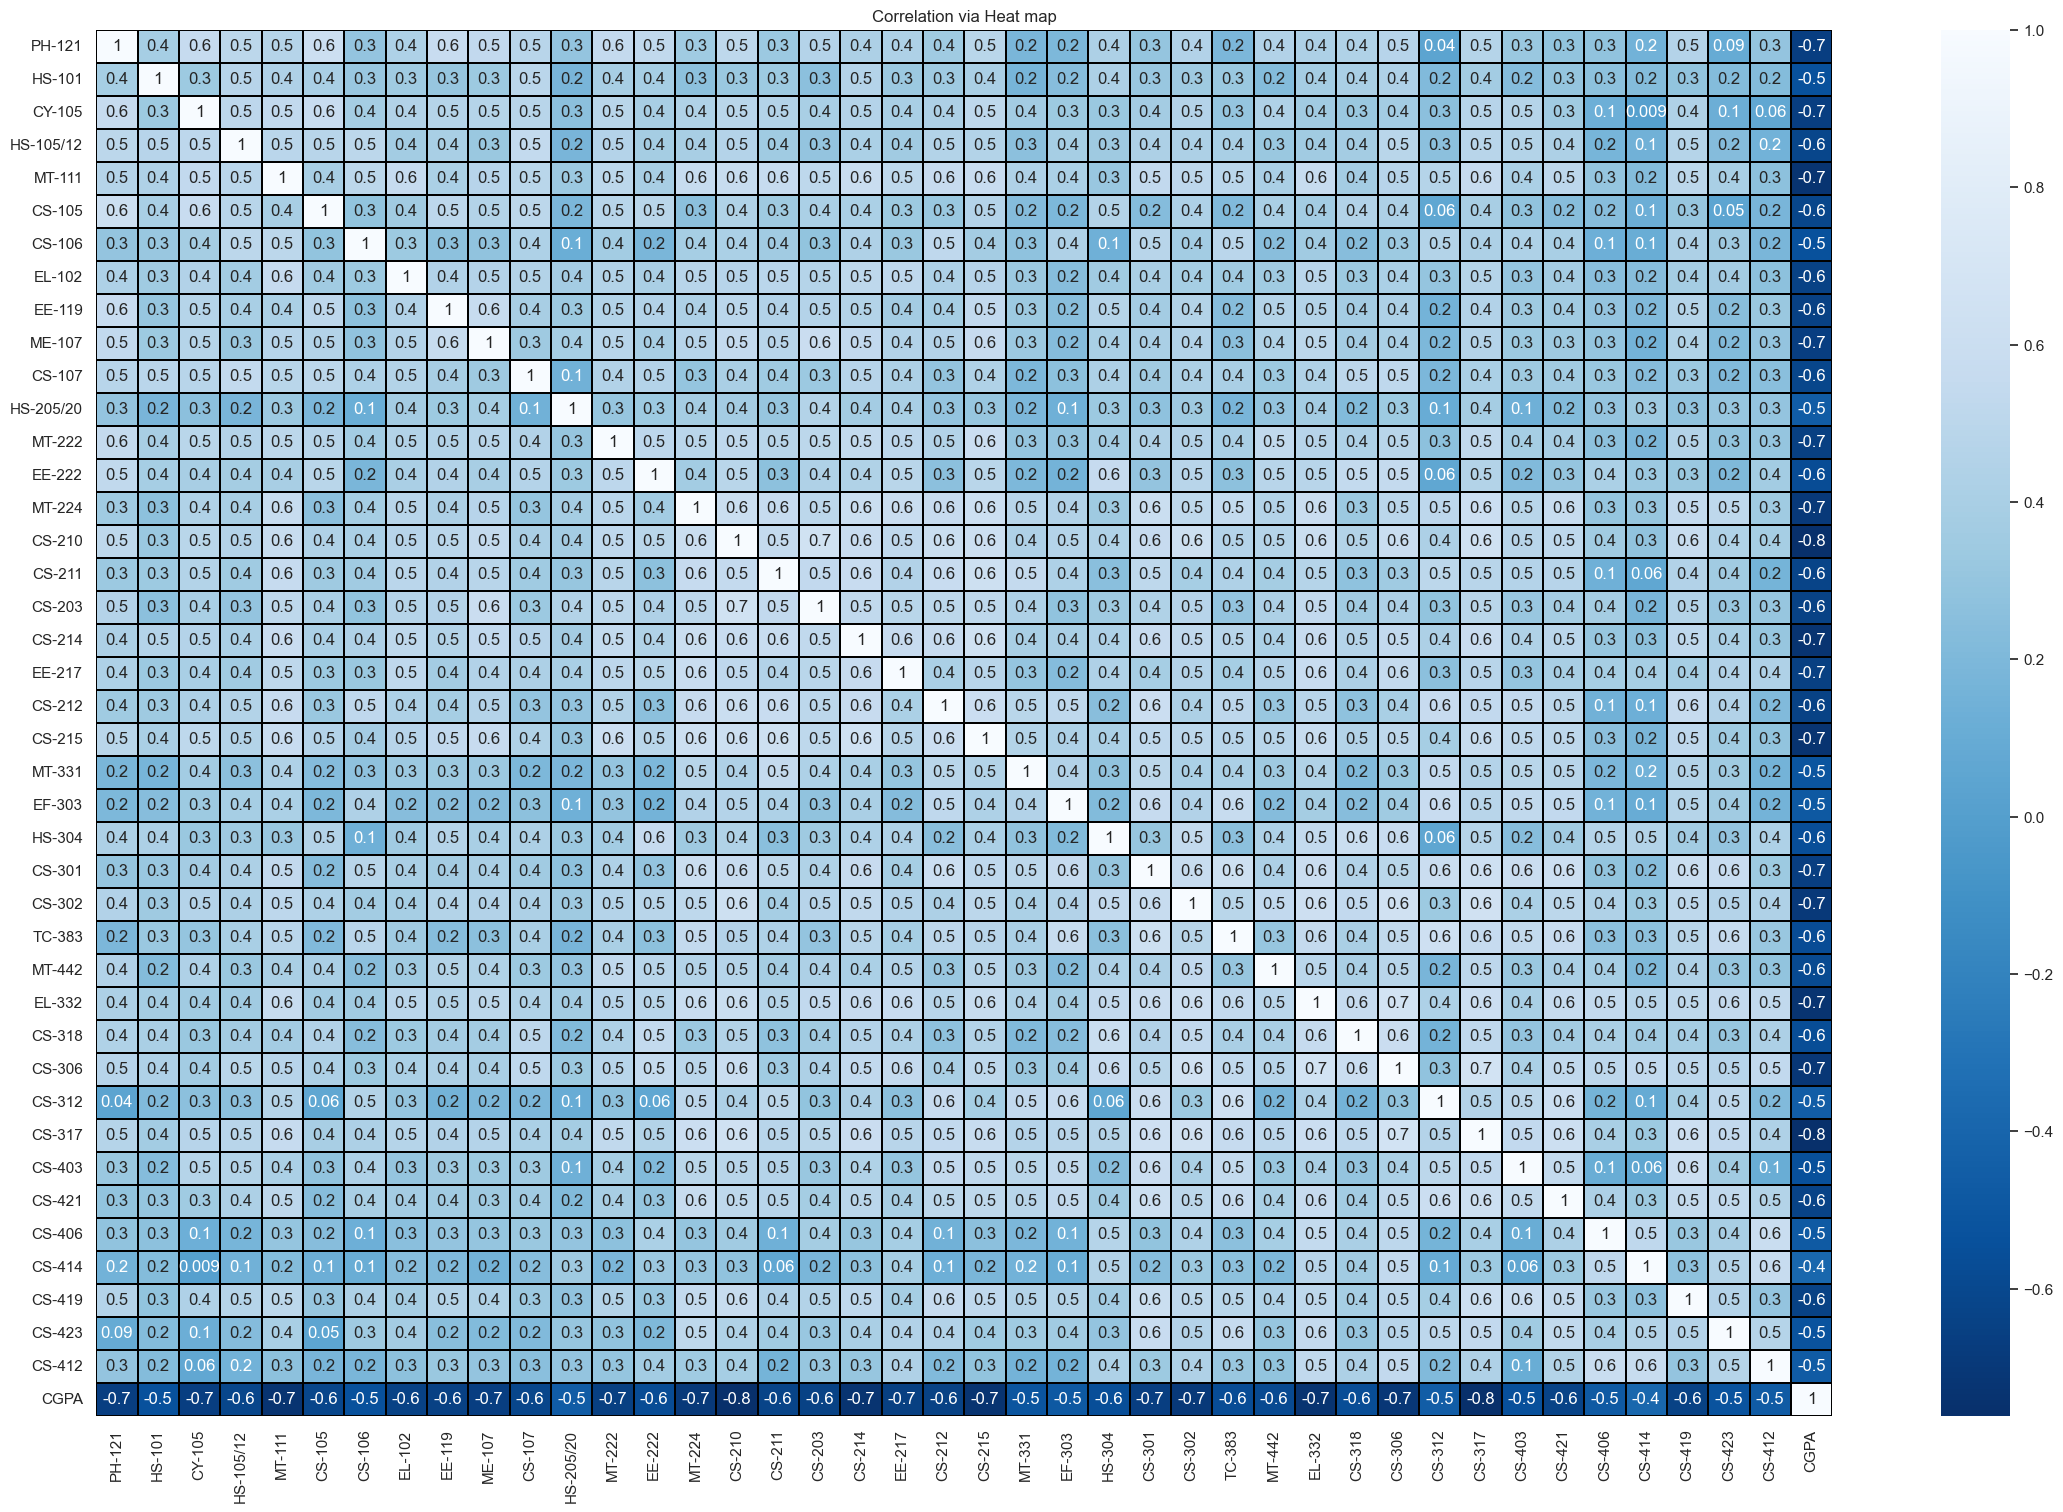

In [21]:
#Visualizing correlation
plt.figure(figsize=(28,18))
sb.heatmap(cor,annot=True,cmap="Blues_r",linecolor='black',linewidths=0.1,fmt='0.1g')
plt.title('Correlation via Heat map')
plt.show()

We can observe the following from this heatmap:  
1)All the features have negative correlation with target variable.    
2)CS-414 feature have low negative correlation with target variable.  
3)CS-210 and CS-317 features have high negative correlation with  target variable.  
4)Rest of the feautures have moderate negative correlation with target variable.

In [22]:
#Separating features and target variable 
x=ds.drop('CGPA',axis=1)
y=ds['CGPA']

In [23]:
#checking dimensions of features and label 
print('Dimensions of features:',x.shape[0],'\nDimensions of label:',y.shape[0])

Dimensions of features: 571 
Dimensions of label: 571


We can observe that both features and lable have same number of dimensions.

In [24]:
#Importing required library to apply StandardScaler
from sklearn.preprocessing import StandardScaler as sc
sc=sc()
x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)
x

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,0.400402,1.770900,1.722261,0.549869,1.374222,2.657832,1.790004,1.333963,0.419492,1.024565,...,0.663660,1.169315,1.155824,1.533685,0.958939,-0.399094,-0.960095,1.740513,-0.346121,-0.450178
1,-1.242052,1.411559,2.397448,1.488043,0.369509,1.173242,1.790004,-1.307365,2.302589,1.342687,...,1.715324,1.764660,1.521056,0.862110,1.325686,-0.399094,1.042149,0.900418,0.727983,-0.021043
2,-1.242052,-0.744483,-0.978490,0.237145,0.034605,-1.053643,0.322008,0.013299,-0.710366,-0.884168,...,-0.738559,-0.319046,-0.670339,-1.152616,0.225444,-1.210063,-0.960095,-1.619869,-0.704156,-1.308446
3,1.714365,0.692879,2.397448,1.488043,1.709126,-0.311348,2.157003,1.333963,1.925970,0.706443,...,1.364769,1.764660,0.425358,2.205260,0.958939,0.817361,0.241251,1.320466,1.086017,1.695494
4,-0.585070,-1.103823,-0.303302,-0.075580,-1.305012,-1.053643,-0.778989,0.013299,-1.463605,-0.884168,...,-0.738559,0.276298,-0.305107,0.190534,-0.141304,-0.399094,-0.960095,-0.779774,-0.704156,-1.308446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,-0.256579,-1.822504,-0.978490,-0.701029,-0.970108,-1.053643,-0.778989,-0.647033,-1.086986,-0.247924,...,-0.037450,-0.616719,-1.035572,-1.152616,-1.975041,-1.210063,0.641700,0.060322,-0.346121,-1.308446
567,-0.913561,-1.822504,-0.978490,-1.326478,-1.305012,-1.053643,-1.512987,-0.647033,-1.463605,-1.520412,...,-0.738559,-0.021374,-0.305107,-1.152616,-1.975041,-0.399094,0.241251,-0.779774,0.727983,-0.450178
568,-0.256579,-1.822504,-0.303302,-0.075580,-1.305012,-1.053643,-1.512987,-1.307365,-1.463605,-0.566046,...,-0.037450,-0.616719,-0.670339,-1.152616,-0.508051,-1.210063,1.442597,0.060322,-0.704156,-0.450178
569,-1.242052,-0.385142,2.059854,-1.326478,1.709126,2.657832,0.322008,1.333963,0.419492,1.024565,...,-0.037450,1.466987,-0.670339,-0.145253,0.958939,2.439300,1.442597,-0.359726,0.369948,1.266360


The data is scaled using StandarScaler method to overcome the issue of biasness.

In [25]:
#Checking varience inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif #Importing required library
v=pd.DataFrame()
v['VIF']=[vif(x.values,i) for i in range(len(x.columns))]
v['Features']=x.columns
v

,VIF,Features
0,2.827608,PH-121
1,1.771294,HS-101
2,2.514966,CY-105
3,2.293035,HS-105/12
4,2.638921,MT-111
5,2.366597,CS-105
6,1.927701,CS-106
7,1.968027,EL-102
8,2.190768,EE-119
9,2.294552,ME-107


Here we can observe that the features do not have multicollineraity problem.

In [26]:
#Importing libraries
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as l
from sklearn.metrics import r2_score

In [27]:
#Finding best random state
ac_updater=0
rs_updater=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test=tts(x,y,test_size=0.30,random_state=i)
    lr=l()
    lr.fit(x_train,y_train)
    pr=lr.predict(x_test)
    ac=r2_score(y_test,pr)
    if ac>ac_updater:
        ac_updater=ac
        rs_updater=i
print('Max r2 score during the iteration is ',ac_updater,'on randome state : ',rs_updater)

Max r2 score during the iteration is  0.9643494726169242 on randome state :  72


In [28]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.30,random_state=rs_updater)#Spliting data

In [29]:
#Importing necessary libraries
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error as mse, mean_absolute_error as mae
from sklearn.svm import SVR as SupportVectorRegression
import numpy as np
from sklearn.model_selection import cross_val_score as cvs

#Creating instance
LR=LinearRegression()
L=Lasso()
R=Ridge()
RFR=RandomForestRegressor()
GBR=GradientBoostingRegressor()
ETR=ExtraTreesRegressor()
DTR=DecisionTreeRegressor()
KNR=KNeighborsRegressor()
SVR=SupportVectorRegression()
    
models=[LR,L,R,RFR,GBR,ETR,DTR,KNR,SVR]#Creating list

log=float('inf')#Initializing 'log' variable  to positive infinity    

for i in models:#Iterating models 
    i.fit(x_train,y_train)
    pr=i.predict(x_test)
    R2score=r2_score(y_test,pr)
    MAE=mae(y_test,pr)
    MSE=mse(y_test,pr)
    RMSE=np.sqrt(MSE)
    score=cvs(i,x,y)
    diff=abs(R2score - score.mean())*100
    
    
    
    #Printing    
    print('\n','R2 score of',str(i).split('(')[0],'is',R2score,'\n','Mean absolute Error of',str(i).split('(')[0],'is',MAE,'\n','Mean squared error of',str(i).split('(')[0],'is',MSE,'\n','Root Mean squared error of',str(i).split('(')[0],'is',RMSE)
    print('\n\nCross validation Score of',str(i).split('(')[0],'is',score,'\nMean: ',score.mean(),'\nDifference between R2 score and cross validation is ',diff)
    
    if diff<log and score.mean()>=0:#Using two condition to execute the following codes i.e. when log is greater than diff and mean of score in not negative
        log=diff#Updating 'log' variable if condition is True
        b_d=diff#Storing difference to 'b_d' variable in context to  the corresponding iteration 
        model=str(i).split('(')[0]#Storing model name to 'model' variable in context to  the corresponding iteration
print(f'\n\n{model} is the best model with least difference between R2 score and cross validation i.e {b_d}')#Printing        


 R2 score of LinearRegression is 0.9643494726169242 
 Mean absolute Error of LinearRegression is 0.08938340774408551 
 Mean squared error of LinearRegression is 0.013741931476875212 
 Root Mean squared error of LinearRegression is 0.11722598464877662


Cross validation Score of LinearRegression is [0.8927601  0.93427094 0.90082619 0.94061762 0.84878197] 
Mean:  0.9034513625626615 
Difference between R2 score and cross validation is  6.089811005426271

 R2 score of Lasso is -0.002069645787602381 
 Mean absolute Error of Lasso is 0.5310373025587224 
 Mean squared error of Lasso is 0.3862599915985248 
 Root Mean squared error of Lasso is 0.6214981831015476


Cross validation Score of Lasso is [-0.00643799 -0.0037979  -0.00364638 -0.00242138 -0.02411396] 
Mean:  -0.008083520623131602 
Difference between R2 score and cross validation is  0.6013874835529222

 R2 score of Ridge is 0.9645753308300019 
 Mean absolute Error of Ridge is 0.08910889992551599 
 Mean squared error of Ridge is 0.0136

Here by comparing difference of R2 score and cross validation  of various models, we can conclude that ExtraTreesRegressor is the best performing model.

In [34]:
#Using GridSearchCV 
from sklearn.model_selection import GridSearchCV as GSC#Importing required library
pa={'n_estimators': [43, 120, 147],'max_depth': [None, 8, 14],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 3],'max_features': ['auto', 'sqrt', 'log2']}
gsc=GSC(ETR,pa)
gsc.fit(x_train,y_train)
gsc.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 43}

In [40]:
#Applying best parameters provided by GridSearchCV
final=ExtraTreesRegressor(max_depth=None,max_features='sqrt',min_samples_leaf=1,min_samples_split= 2,n_estimators=43)

In [42]:
final.fit(x_train,y_train)
pr=final.predict(x_test)
print('R2 score :',r2_score(y_test,pr))
print('Mean Absolute Error:',mae(y_test,pr))
print('Mean Squared Error :',mse(y_test,pr))
print('Root Mean Squared Error:',np.sqrt(MSE))

R2 score : 0.9700591135988414
Mean Absolute Error: 0.08206557598702001
Mean Squared Error : 0.011541080580955132
Root Mean Squared Error: 0.10367648625315652


R2 score is increased from 92% to 97%  and there is decrease in errors.

In [43]:
#Conclusion
Predicted_values=final.predict(x_test)
Original_values=y_test
conclusion=pd.DataFrame({'Predicted Values':Predicted_values,'Original Values':Original_values})
conclusion.sample(20)

,Predicted Values,Original Values
98,3.850093,3.963
179,3.065302,3.076
498,3.932279,3.970
184,2.917349,2.971
238,3.322674,3.353
249,2.719279,2.785
12,2.711605,2.792
186,2.112186,2.053
563,2.652070,2.612
540,3.715744,3.765


Here we can conclude that the model predicted values are close enough to the original values. 

In [44]:
#Saving the model
import joblib
joblib.dump(final,r'D:\Models\WHR.obj')

['D:\\Models\\WHR.obj']